<a href="https://colab.research.google.com/github/milindkesar/TS/blob/master/ClassificationofNumbersfromhandwrittenimages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [7]:
(X_train,y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [8]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [10]:
print(X_train[0].shape)

(28, 28)


In [0]:
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28, 28, 1)


In [16]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
hist = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 167s 3ms/step - loss: 0.2327 - accuracy: 0.9525 - val_loss: 0.0784 - val_accuracy: 0.9753
Epoch 2/3
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0637 - accuracy: 0.9802 - val_loss: 0.0789 - val_accuracy: 0.9764
Epoch 3/3
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0457 - accuracy: 0.9857 - val_loss: 0.1054 - val_accuracy: 0.9723


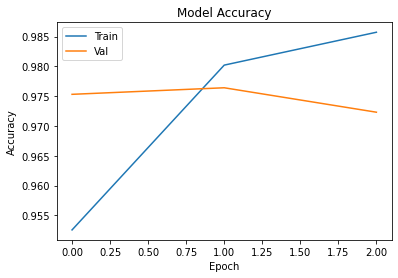

In [26]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

<built-in method keys of dict object at 0x7fe742595750>


<built-in method keys of dict object at 0x7fe742595750>


<built-in method keys of dict object at 0x7fe742595750>


In [25]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
